In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import accuracy
import torch
import torch.nn as nn

In [3]:
PATH = "/project/DSone/as3ek/data/patches/1000/gannorm_seem_cinn/"
sz = 256
tfms = get_transforms(do_flip=True, flip_vert=True, max_zoom=1.1)

In [4]:
data = (ImageItemList.from_folder(PATH)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=sz)
        .databunch(bs=32)
        .normalize(imagenet_stats))

In [5]:
device_ids = list(range(torch.cuda.device_count()))

In [6]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [7]:
learn.model = nn.DataParallel(learn.model, device_ids=device_ids)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-04


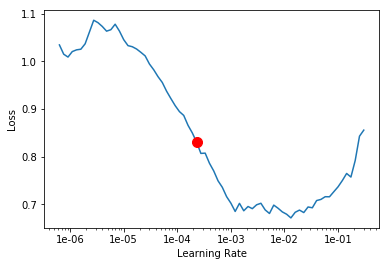

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

KeyboardInterrupt: 

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

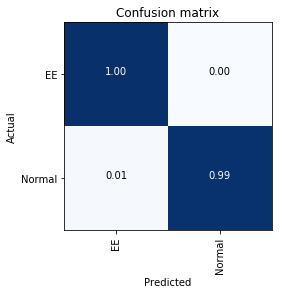

In [15]:
interp.plot_confusion_matrix(normalize=True)

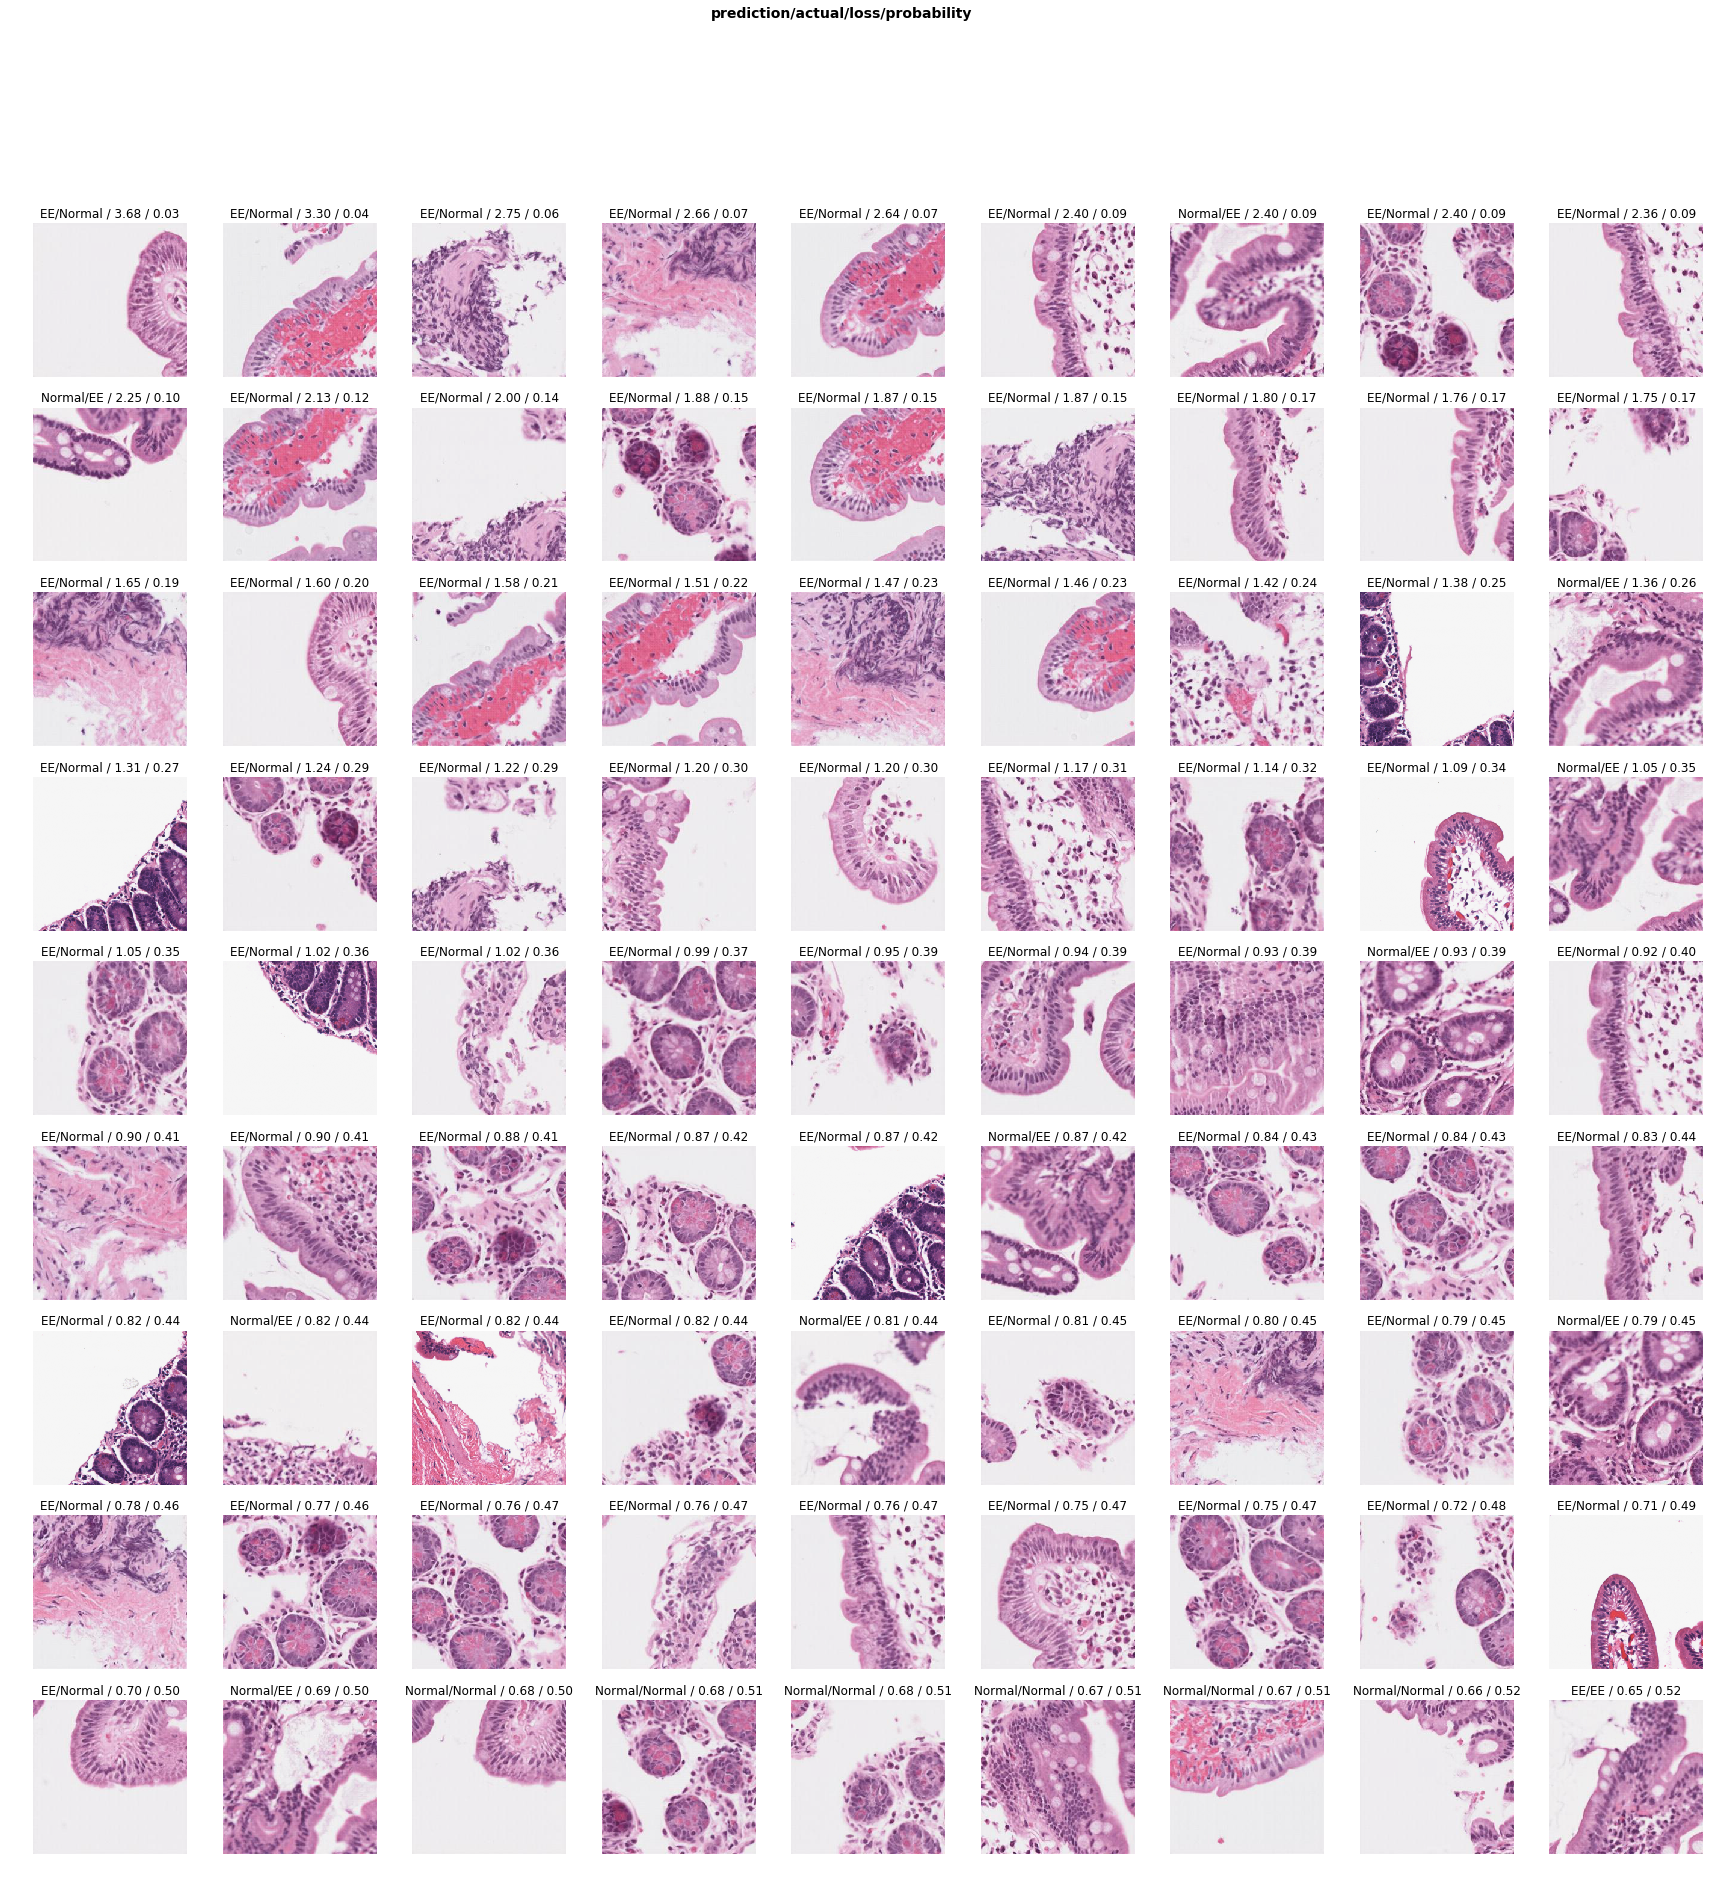

In [41]:
interp.plot_top_losses(81, figsize=(30, 30))

In [ ]:
data.